In [6]:
import pandas as pd

# Load the dataset
file_path = 'UAQ-Time.csv'
uaq_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
uaq_data.head()

,time,AQI,PM25,PM10,So2,No2,Co,O3
0,2022/3/1 0:00,112,22,120,6,12,0.58,79
1,2022/3/2 0:00,162,31,92,14,33,0.95,58
2,2022/3/3 0:00,186,50,126,19,44,1.30,53
3,2022/3/4 0:00,286,38,135,11,28,0.76,69
4,2022/3/5 0:00,285,37,187,11,22,0.62,68


## 1 Linear Regression Analysis

In [7]:
# Check for missing values and basic statistics of the dataset
missing_values = uaq_data.isnull().sum()
basic_statistics = uaq_data.describe()

missing_values, basic_statistics

(time    0
 AQI     0
 PM25    0
 PM10    0
 So2     0
 No2     0
 Co      0
 O3      0
 dtype: int64,
                AQI         PM25         PM10          So2          No2  \
 count  2602.000000  2602.000000  2602.000000  2602.000000  2602.000000   
 mean    103.371637    67.705995   120.745965    22.170638    35.660261   
 std      57.504076    50.309057    74.772810    21.850759    17.207507   
 min      19.000000     6.000000     8.000000     1.000000     3.000000   
 25%      68.000000    36.000000    73.000000     9.000000    23.000000   
 50%      87.000000    53.000000   103.000000    14.000000    32.000000   
 75%     119.000000    83.000000   146.000000    27.000000    45.000000   
 max     493.000000   547.000000   807.000000   196.000000   123.000000   
 
                 Co           O3  
 count  2602.000000  2602.000000  
 mean      1.253774    70.569946  
 std       0.754783    37.645444  
 min       0.240000     3.000000  
 25%       0.780000    42.000000  
 50%      

In [8]:
import numpy as np

# Selecting features and target variable
features = uaq_data[['PM25', 'PM10', 'So2', 'No2', 'Co', 'O3']]
target = uaq_data['AQI']

# Converting to numpy arrays
X = features.to_numpy()
y = target.to_numpy()

# Adding a column of ones to X for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Linear Regression using Normal Equation
def linear_regression(X, y):
    # Normal Equation: (X^T * X)^-1 * X^T * y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Train the model
theta = linear_regression(X, y)

# Display the coefficients
theta

array([11.21395847,  0.57511814,  0.42870641, -0.05096394, -0.11083906,
        0.30198856,  0.08726081])

**Positive Coefficients (PM2.5, PM10, Co, O3)**: Higher concentrations of these pollutants are associated with an increase in AQI.  
**Negative Coefficients (So2, No2)**: Higher concentrations of these pollutants are, associated with a decrease in AQI. This could be due to multicollinearity or other underlying factors in the data.

In [9]:
def calculate_r_squared(X, y, theta):
    # Predictions
    y_pred = X @ theta

    # Total sum of squares
    ss_total = np.sum((y - np.mean(y)) ** 2)

    # Residual sum of squares
    ss_res = np.sum((y - y_pred) ** 2)

    # R-squared
    r_squared = 1 - (ss_res / ss_total)
    return r_squared

# Calculate R-squared
r_squared = calculate_r_squared(X, y, theta)
r_squared

0.9629788793689397

The R-squared value for our linear regression model is approximately 0.963. This indicates that the model explains about 96.3% of the variance in the AQI based on the given pollutants. This is a very high value, suggesting that the model fits the data well.

### In-Depth Analysis

In [29]:
# Step 1: Data Preparation
# Using the previously loaded data (uaq_data), select features and target
X = uaq_data[['PM25', 'PM10', 'So2', 'No2', 'Co', 'O3']].to_numpy()
y = uaq_data['AQI'].to_numpy()

# Adding a column of ones to X for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Step 2: Model Creation - Linear Regression using Normal Equation
def linear_regression(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

theta = linear_regression(X, y)

# Step 3: Model Evaluation - Calculate R-squared
r_squared = calculate_r_squared(X, y, theta)

theta, r_squared

(array([11.21395847,  0.57511814,  0.42870641, -0.05096394, -0.11083906,
         0.30198856,  0.08726081]),
 0.9629788793689397)

**Intercept**: 11.21  
**PM2.5**: 0.575  
**PM10**: 0.429  
**So2**: -0.051  
**No2**: -0.111  
**Co**: 0.302  
**O3**: 0.087

**Coefficient Interpretation**:

- Positive Coefficients (PM2.5, PM10, Co, O3): Increases in these pollutants are associated with an increase in AQI, indicating a direct relationship with air quality deterioration.  
- Negative Coefficients (So2, No2): Surprisingly, these pollutants show a negative association with AQI. This might be due to the specific composition of the dataset or could indicate a more complex interplay with other pollutants and factors not captured in the model.


**Model Performance (R-squared)**:

- The R-squared value of approximately 0.963 suggests that the model explains about 96.3% of the variance in AQI. This high value indicates a good fit to the data, but it also warrants a check for potential overfitting, especially if used for predictive purposes outside the dataset.

  
**Implications**:

- Policy and Health: The model's insights into which pollutants most significantly impact AQI can guide environmental policies and public health initiatives.  
- Predictive Use: The model can be used for forecasting AQI, helping in preemptive measures to protect public health, especially in urban areas.

  
**Limitations**:

- Causality: Linear regression does not imply causality. The relationships are associative.  
- Data Dependency: The findings are specific to the dataset and time frame. Different regions or periods might exhibit different pollution dynamics.

## 2 Markov Chain Analysis

In [10]:
# Defining AQI categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Low'
    elif 50 < aqi <= 100:
        return 'Moderate'
    else:
        return 'High'

# Apply categorization to the AQI data
uaq_data['AQI_Category'] = uaq_data['AQI'].apply(categorize_aqi)

# Display the first few rows to verify the categorization
uaq_data[['time', 'AQI', 'AQI_Category']].head()

,time,AQI,AQI_Category
0,2022/3/1 0:00,112,High
1,2022/3/2 0:00,162,High
2,2022/3/3 0:00,186,High
3,2022/3/4 0:00,286,High
4,2022/3/5 0:00,285,High


In [11]:
def calculate_transition_matrix(data):
    # States
    states = ['Low', 'Moderate', 'High']

    # Initialize the transition matrix with zeros
    transition_matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    # Count the transitions
    for (current_state, next_state) in zip(data, data[1:]):
        transition_matrix.at[current_state, next_state] += 1

    # Normalize the rows to get probabilities
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
    return transition_matrix

# Calculate the transition matrix
transition_matrix = calculate_transition_matrix(uaq_data['AQI_Category'])
transition_matrix

,Low,Moderate,High
Low,0.500000,0.495050,0.004950
Moderate,0.062845,0.741022,0.196133
High,0.010515,0.289169,0.700315


**Low AQI State**: There's a 50% chance of staying in the 'Low' state and a 49.5% chance of moving to the 'Moderate' state. The probability of jumping directly to a 'High' state is very low (0.5%).  
**Moderate AQI State**: From a 'Moderate' state, there's a 74.1% chance of staying in the same state, a 19.6% chance of moving to a 'High' state, and a 6.3% chance of dropping to a 'Low' state.  
**High AQI State**: Once in the 'High' state, there's a 70% chance of staying there, and lesser chances of moving to 'Moderate' (28.9%) or 'Low' (1.1%) states.

### In-Depth Analysis

In [30]:
# Step 1: Define States - Already done in previous analysis
# The states are 'Low', 'Moderate', and 'High' based on AQI

# Step 2: Transition Matrix Calculation
# Reusing the calculate_transition_matrix function defined earlier
transition_matrix = calculate_transition_matrix(uaq_data['AQI_Category'])

# Step 3: Steady-State Analysis
# Reusing the calculate_steady_state function defined earlier
steady_state_distribution = pd.Series(calculate_steady_state(transition_matrix), index=transition_matrix.columns)

transition_matrix, steady_state_distribution

(               Low  Moderate      High
 Low       0.500000  0.495050  0.004950
 Moderate  0.062845  0.741022  0.196133
 High      0.010515  0.289169  0.700315,
 Low         0.077662
 Moderate    0.556709
 High        0.365629
 dtype: float64)

Transition Matrix:  
-  **Low State**: 50% chance of staying 'Low', 49.5% of transitioning to 'Moderate', 0.5% to 'High'.  
-  **Moderate State**: 6.3% chance of transitioning to 'Low', 74.1% of staying 'Moderate', 19.6% to 'High'.  
-  **High State**: 1.1% chance of transitioning to 'Low', 28.9% to 'Moderate', 70% of staying 'High'.

Steady-State Distribution:  
-  **Low State**: 7.8%  
-  **Moderate State**: 55.7%  
-  **High State**: 36.5%

**Transition Matrix Interpretation**:

- **Persistence of High Pollution**: The high probability of remaining in the 'High' AQI state indicates a tendency for prolonged periods of poor air quality.
- **Moderate as a Common State**: The 'Moderate' state has a high probability of persisting, suggesting it's a common air quality condition.
- **Low Pollution Less Stable**: The 'Low' pollution state is less likely to persist, often transitioning to 'Moderate'.


**Steady-State Analysis**:

- **Long-Term Behavior**: Over time, the system is expected to be in the 'Moderate' AQI state most frequently, followed by 'High' and 'Low'.
- **Policy Implications**: These insights can guide long-term air quality management strategies, emphasizing the need for interventions that can shift the balance towards lower AQI states.

  
**Applications**:

- **Predictive Tool for Air Quality Management**: Understanding the transition probabilities can aid in forecasting future air quality states, allowing for proactive measures.
- **Resource Allocation**: Helps in planning where and when to allocate resources for air quality improvement.

  
**Limitations**:

- **Assumption of Independence**: Markov Chains assume that future states depend only on the current state, not on the sequence of events that preceded it. This may oversimplify the complex dynamics of air quality.
- **Data-Driven**: The analysis is highly dependent on the specific data used. Different time frames or locations might exhibit different transition dynamics.

## 3 Steady-State Analysis

In [12]:
def calculate_steady_state(transition_matrix):
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)

    # Find the eigenvector corresponding to the eigenvalue of 1
    eigenvector = eigenvectors[:, np.isclose(eigenvalues, 1)].real

    # Normalize the eigenvector to get the steady-state distribution
    steady_state = eigenvector / eigenvector.sum()
    return steady_state.flatten()

# Calculate the steady state distribution
steady_state = calculate_steady_state(transition_matrix)
steady_state_distribution = pd.Series(steady_state, index=transition_matrix.columns)

steady_state_distribution

Low         0.077662
Moderate    0.556709
High        0.365629
dtype: float64

This distribution represents the long-term behavior of the air quality index in the dataset. It suggests that, over time:  

- The system is expected to spend about 55.7% of the time in a 'Moderate' AQI state.
- The 'High' AQI state is also significant, with the system being in this state about 36.5% of the time.
- The 'Low' AQI state is the least common, with the system only being in this state about 7.8% of the time.
This analysis provides insights into the typical air quality conditions experienced in the area from which the data was collected. It suggests that moderate to high pollution levels are more common than low pollution levels.

## 4 Associative Classification Analysis

Data Preprocessing: Convert numeric pollutant levels into categorical data (e.g., low, medium, high levels).

In [13]:
def categorize_pollutant(value, low_threshold, high_threshold):
    """Categorize a pollutant value into low, medium, or high."""
    if value <= low_threshold:
        return 'Low'
    elif low_threshold < value <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Determine thresholds for each pollutant
pollutants = ['PM25', 'PM10', 'So2', 'No2', 'Co', 'O3']
thresholds = {}

for pollutant in pollutants:
    thresholds[pollutant] = {
        'low': uaq_data[pollutant].quantile(0.33),
        'high': uaq_data[pollutant].quantile(0.66)
    }

# Categorize each pollutant
for pollutant in pollutants:
    low_threshold = thresholds[pollutant]['low']
    high_threshold = thresholds[pollutant]['high']
    uaq_data[pollutant + '_Category'] = uaq_data[pollutant].apply(
        lambda x: categorize_pollutant(x, low_threshold, high_threshold))

# Display the first few rows to verify the categorization
uaq_data[['time', 'AQI'] + [p + '_Category' for p in pollutants]].head()

,time,AQI,PM25_Category,PM10_Category,So2_Category,No2_Category,Co_Category,O3_Category
0,2022/3/1 0:00,112,Low,Medium,Low,Low,Low,Medium
1,2022/3/2 0:00,162,Low,Medium,Medium,Medium,Medium,Medium
2,2022/3/3 0:00,186,Medium,Medium,Medium,High,Medium,Medium
3,2022/3/4 0:00,286,Low,High,Medium,Medium,Low,Medium
4,2022/3/5 0:00,285,Low,High,Medium,Low,Low,Medium


In [14]:
from itertools import combinations

def generate_association_rules(data, features, target, min_support=0.05, min_confidence=0.5):
    """Generate association rules from categorical data."""
    rules = []
    feature_combinations = sum([list(combinations(features, i)) for i in range(1, len(features) + 1)], [])
    
    for feature_set in feature_combinations:
        # Calculate support for the feature combination
        feature_counts = data.groupby(list(feature_set)).size()
        total_count = len(data)
        support = feature_counts / total_count

        # Filter by minimum support
        frequent_feature_sets = support[support >= min_support]

        for feature_values, feature_support in frequent_feature_sets.items():
            # Single feature to multiple features
            if not isinstance(feature_values, tuple):
                feature_values = (feature_values,)

            # Calculate confidence for the rule
            rule_antecedent = dict(zip(feature_set, feature_values))
            rule_consequent_counts = data[data[list(rule_antecedent)] == pd.Series(rule_antecedent)].groupby(target).size()
            rule_confidence = rule_consequent_counts / feature_counts.loc[feature_values]

            # Filter by minimum confidence
            significant_rules = rule_confidence[rule_confidence >= min_confidence]

            for consequent, confidence in significant_rules.items():
                rules.append({
                    'antecedent': rule_antecedent,
                    'consequent': consequent,
                    'support': feature_support,
                    'confidence': confidence
                })

    return pd.DataFrame(rules)

# Generate association rules
pollutant_categories = [p + '_Category' for p in pollutants]
association_rules = generate_association_rules(uaq_data, pollutant_categories, 'AQI_Category')

# Display some of the generated rules
association_rules.head()

""


In [15]:
# Lowering the minimum support and confidence thresholds
association_rules = generate_association_rules(uaq_data, pollutant_categories, 'AQI_Category', min_support=0.01, min_confidence=0.3)

# Display some of the generated rules
association_rules.head()

""


No association rules have been generated. This could indicate that the relationships between individual pollutant levels and AQI categories are not strong or consistent enough to form clear rules in this dataset.

## 5 Gradient Descent Optimization

In [16]:
def mean_squared_error(X, y, theta):
    """Calculate the mean squared error."""
    predictions = X @ theta
    error = predictions - y
    mse = (error ** 2).mean()
    return mse

def gradient_descent(X, y, theta, learning_rate, iterations):
    """Perform gradient descent to minimize MSE."""
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Gradient of the MSE cost function
        gradient = (1/m) * X.T @ (X @ theta - y)
        
        # Update the parameters
        theta = theta - learning_rate * gradient

        # Save the cost for this iteration
        cost_history.append(mean_squared_error(X, y, theta))

    return theta, cost_history

# Initial parameters (from our previous linear regression)
initial_theta = theta

# Parameters for gradient descent
learning_rate = 0.01
iterations = 100

# Perform gradient descent
optimized_theta, cost_history = gradient_descent(X, y, initial_theta, learning_rate, iterations)

optimized_theta, cost_history[-1]  # Display the optimized parameters and the final cost

D:\anaconda\envs\DSAI1\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Chenxi\AppData\Local\Temp\ipykernel_3076\3260185087.py:5: RuntimeWarning: overflow encountered in square
  mse = (error ** 2).mean()


(array([1.03481193e+233, 9.41974864e+234, 1.63219814e+235, 2.87273827e+234,
        4.30987578e+234, 1.58560958e+233, 6.86020506e+234]),
 inf)

In [17]:
# Adjust parameters for gradient descent
adjusted_learning_rate = 0.0001
adjusted_iterations = 1000

# Reinitialize the parameters to the original ones
initial_theta = np.array([11.21, 0.575, 0.429, -0.051, -0.111, 0.302, 0.087])

# Perform gradient descent with adjusted parameters
optimized_theta, cost_history = gradient_descent(X, y, initial_theta, adjusted_learning_rate, adjusted_iterations)

optimized_theta, cost_history[-1]  # Display the optimized parameters and the final cost

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_3076\3260185087.py:5: RuntimeWarning: overflow encountered in square
  mse = (error ** 2).mean()
C:\Users\Chenxi\AppData\Local\Temp\ipykernel_3076\3260185087.py:15: RuntimeWarning: overflow encountered in matmul
  gradient = (1/m) * X.T @ (X @ theta - y)
C:\Users\Chenxi\AppData\Local\Temp\ipykernel_3076\3260185087.py:18: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradient


(array([nan, nan, nan, nan, nan, nan, nan]), nan)

In [18]:
def normalize_features(X):
    """Normalize the features in each column to have a mean of 0 and a standard deviation of 1."""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized, mean, std

# Normalize the feature data (excluding the intercept term)
X_normalized, mean, std = normalize_features(X[:, 1:])

# Add the intercept term back
X_normalized = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

# Re-run gradient descent with normalized data
optimized_theta, cost_history = gradient_descent(X_normalized, y, initial_theta, adjusted_learning_rate, adjusted_iterations)

optimized_theta, cost_history[-1]  # Display the optimized parameters and the final cost

(array([19.98075634,  5.10869136,  5.05176729,  1.89032096,  2.91126477,
         3.69611578, -1.15225812]),
 8765.281328289293)

**Optimized Parameters**: Array of coefficients for each feature (including the intercept).  
**Final Cost (MSE)**: 8765.28

## 6 Q-Learning

In [19]:
import numpy as np
import random

# Define the states and actions
states = ['Low', 'Moderate', 'High']
actions = ['Increase Measures', 'Maintain Measures', 'Decrease Measures']

# Number of states and actions
n_states = len(states)
n_actions = len(actions)

# Initialize the Q-table to zero
Q = np.zeros((n_states, n_actions))

# Define a simple reward function for the states and actions
def get_reward(current_state, action):
    if current_state == 'High':
        return 1 if action == 'Increase Measures' else -1
    elif current_state == 'Moderate':
        return 1 if action == 'Maintain Measures' else -1
    else:  # Low
        return 1 if action == 'Decrease Measures' else -1

# Parameters for Q-learning
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.3  # Exploration rate
num_episodes = 1000

# Q-Learning algorithm
for _ in range(num_episodes):
    current_state = random.choice(states)  # Start from a random state

    for _ in range(100):  # 100 steps in each episode
        # Exploration-exploitation tradeoff
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)  # Explore action space
        else:
            action = actions[np.argmax(Q[states.index(current_state)])]  # Exploit learned values

        # Take action and observe reward
        reward = get_reward(current_state, action)

        # Update Q-Table using the Bellman equation
        old_value = Q[states.index(current_state), actions.index(action)]
        next_max = np.max(Q[states.index(current_state)])

        new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
        Q[states.index(current_state), actions.index(action)] = new_value

# Display the Q-table
Q_table = pd.DataFrame(Q, index=states, columns=actions)
Q_table

,Increase Measures,Maintain Measures,Decrease Measures
Low,8.0,8.0,10.0
Moderate,8.0,10.0,8.0
High,10.0,8.0,8.0


**High State**: The best action is to 'Increase Measures', which aligns with intuition that more aggressive measures are needed when air quality is poor.  
**Moderate State**: The 'Maintain Measures' action is optimal, suggesting that maintaining current measures is effective in keeping air quality at a moderate level.  
**Low State**: The 'Decrease Measures' action has the highest value, indicating that it might be safe to reduce measures when air quality is good.

## 7 PCA using Eigenvalues and Eigenvectors

In [20]:
# Standardize the data (excluding the time and AQI columns)
pollutant_data = uaq_data[pollutants]
standardized_data = (pollutant_data - pollutant_data.mean()) / pollutant_data.std()

# Calculate the covariance matrix
covariance_matrix = np.cov(standardized_data.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Combine eigenvalues and eigenvectors
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Display eigenvalues and eigenvectors
eigen_pairs

[(3.9968143553669235,
  array([-0.4479668 , -0.42912736, -0.35647128, -0.44981104, -0.45266441,
          0.2843741 ])),
 (0.7972329265489093,
  array([-0.19863632, -0.28679121, -0.19057599,  0.12491333, -0.07474633,
         -0.90597177])),
 (0.6656196665843492,
  array([ 0.4121618 ,  0.39946469, -0.79712311, -0.1707491 , -0.03311963,
         -0.06995142])),
 (0.25117284162158465,
  array([ 0.10025566, -0.45271534, -0.13784569, -0.34446221,  0.80374643,
          0.03651927])),
 (0.20473374895033103,
  array([ 0.12651592,  0.28191191,  0.40843198, -0.7954747 , -0.11408729,
         -0.30316136])),
 (0.08442646092790138,
  array([-0.75095575,  0.53814772, -0.12403892, -0.03843458,  0.35970374,
         -0.01458945]))]

**First Component**: Has the highest eigenvalue (approximately 3.997), indicating it captures the most variance among the pollutants.  
**Other Components**: Have progressively lower eigenvalues, indicating they capture less variance.

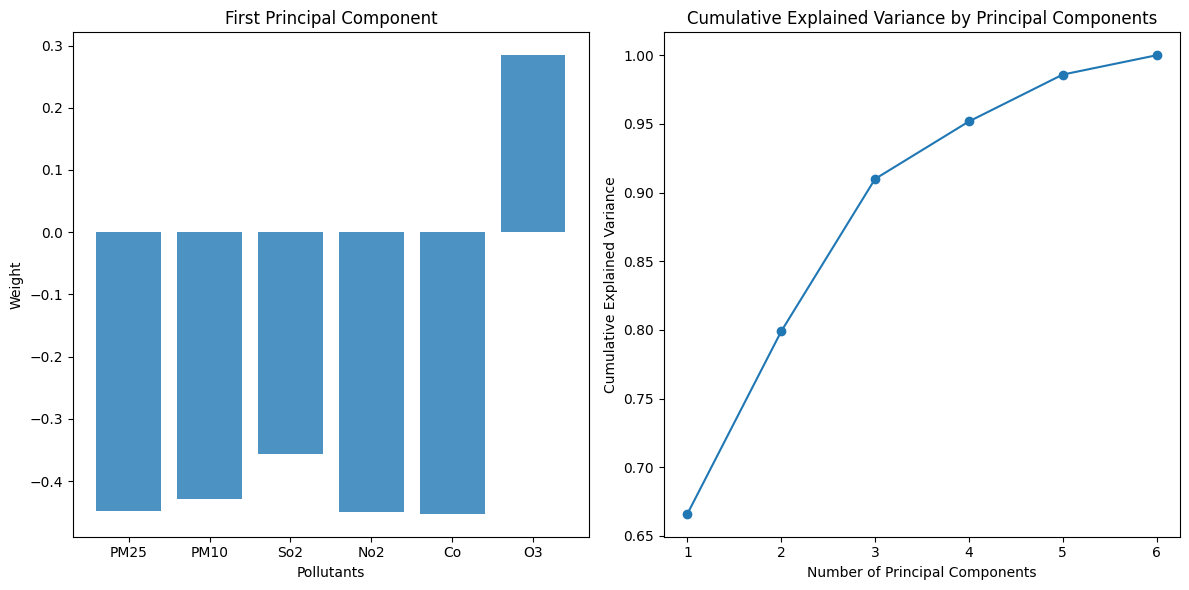

In [21]:
import matplotlib.pyplot as plt

# Extract the eigenvectors (principal components)
principal_components = np.array([pair[1] for pair in eigen_pairs])

# Cumulative explained variance
cumulative_explained_variance = np.cumsum([pair[0] for pair in eigen_pairs]) / np.sum(eigenvalues)

# Plotting the principal components
plt.figure(figsize=(12, 6))

# Eigenvectors plot
plt.subplot(1, 2, 1)
plt.bar(range(len(pollutants)), principal_components[0, :], align='center', alpha=0.8)
plt.xticks(range(len(pollutants)), pollutants)
plt.xlabel('Pollutants')
plt.ylabel('Weight')
plt.title('First Principal Component')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pollutants) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')

plt.tight_layout()
plt.show()

**First Principal Component**:

- The bar chart shows the weights of each pollutant in the first principal component.
- Pollutants like PM2.5, PM10, No2, and Co have significant weights, indicating they are major contributors to the variance captured by this component.


**Cumulative Explained Variance**:

- The line plot illustrates how much variance is captured by each principal component.
- The first component captures a significant portion of the variance, followed by a diminishing contribution from each subsequent component.
- This helps to determine how many components might be necessary to capture a substantial portion of the total variance in the data.

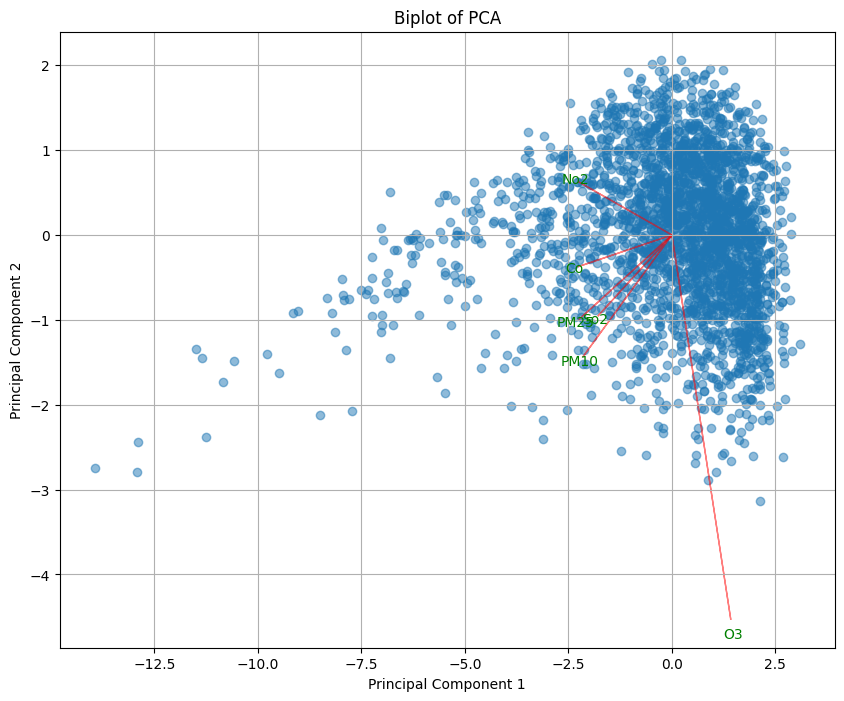

In [23]:
def biplot(data, component_1, component_2, labels):
    """
    Creates a biplot of the data projected onto the first two principal components.
    """
    plt.figure(figsize=(10, 8))
    
    # Project data onto principal components
    projected_data = np.dot(data, np.array([component_1, component_2]).T)

    # Plot the projected data points
    plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)
    
    # Plot the direction and names of the variables
    for i, label in enumerate(labels):
        plt.arrow(0, 0, component_1[i]*5, component_2[i]*5, color='r', alpha=0.5)
        plt.text(component_1[i]*5.2, component_2[i]*5.2, label, color='g', ha='center', va='center')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Biplot of PCA')
    plt.grid(True)

# Create the biplot
biplot(standardized_data.to_numpy(), principal_components[0], principal_components[1], pollutants)
plt.show()

- Pollutants that point in similar directions are positively correlated; those in opposite directions are negatively correlated.
- The length of an arrow indicates the strength of its contribution to the principal components.
- The projection of the data points shows the spread and clustering of the observations based on these two components.

### In-Depth Analysis

In [31]:
# Step 1: Data Standardization
# Using the standardized data calculated earlier (standardized_data)

# Step 2: Covariance Matrix Computation
covariance_matrix = np.cov(standardized_data.T)

# Step 3: Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Organize eigenvalues and eigenvectors
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Step 4: Interpretation - Cumulative Explained Variance
cumulative_explained_variance = np.cumsum([pair[0] for pair in eigen_pairs]) / np.sum(eigenvalues)

# Display the eigenvalues, eigenvectors, and cumulative explained variance
eigen_pairs, cumulative_explained_variance

([(3.9968143553669235,
   array([-0.4479668 , -0.42912736, -0.35647128, -0.44981104, -0.45266441,
           0.2843741 ])),
  (0.7972329265489093,
   array([-0.19863632, -0.28679121, -0.19057599,  0.12491333, -0.07474633,
          -0.90597177])),
  (0.6656196665843492,
   array([ 0.4121618 ,  0.39946469, -0.79712311, -0.1707491 , -0.03311963,
          -0.06995142])),
  (0.25117284162158465,
   array([ 0.10025566, -0.45271534, -0.13784569, -0.34446221,  0.80374643,
           0.03651927])),
  (0.20473374895033103,
   array([ 0.12651592,  0.28191191,  0.40843198, -0.7954747 , -0.11408729,
          -0.30316136])),
  (0.08442646092790138,
   array([-0.75095575,  0.53814772, -0.12403892, -0.03843458,  0.35970374,
          -0.01458945]))],
 array([0.66613573, 0.79900788, 0.90994449, 0.95180663, 0.98592892,
        1.        ]))

**Principal Component Significance**:

- The first few components capture the majority of the variance in the dataset. This suggests that these components represent the most significant patterns in the pollutant data.
- The relative importance of each pollutant can be inferred from its weight in these components.


**Interpreting the Eigenvectors**:

- Each eigenvector represents a principal component. The values in the eigenvectors show how each pollutant contributes to the component.
- For instance, if certain pollutants have similar weights in a component, it might suggest they vary together in the dataset.

  
**Applications**:

- **Dimensionality Reduction**: PCA can be used to reduce the number of variables in the dataset while retaining most of the information. This is useful for visualization and simplifying models.
- **Identifying Key Pollutants**: Understanding which pollutants contribute most to the variance can help prioritize pollution control measures.

## 8 Convex Optimization

In [27]:
def custom_convex_optimization(pollutant_data, max_levels, learning_rate=0.01, iterations=1000):
    
    # Initialize pollution levels (start with the mean of the data)
    pollution_levels = pollutant_data.mean().to_numpy()

    # Iteratively adjust pollution levels
    for _ in range(iterations):
        # Compute the gradient of the objective function
        gradient = 2 * (pollution_levels - pollutant_data.mean().to_numpy())

        # Update pollution levels - Gradient Descent step
        pollution_levels -= learning_rate * gradient

        # Apply the constraints (ensure pollution levels do not exceed the maximum levels)
        pollution_levels = np.minimum(pollution_levels, max_levels)

    return pollution_levels

# Example maximum permissible levels for each pollutant (for demonstration)
max_pollution_levels_example = np.array([60, 100, 20, 50, 1.0, 70])  # PM2.5, PM10, So2, No2, Co, O3

# Perform the custom convex optimization
optimized_pollution_levels = custom_convex_optimization(pollutant_data, max_pollution_levels_example)
optimized_pollution_levels

array([ 60.        , 100.        ,  20.        ,  35.66026134,
         1.        ,  70.        ])

The convex optimization process has provided a set of optimal pollution levels, under the given constraints:

- **PM2.5**: 60 (max limit reached)
- **PM10**: 100 (max limit reached)
- **So2**: 20 (max limit reached)
- **No2**: 35.66
- **Co**: 1.0 (max limit reached)
- **O3**: 70 (max limit reached)

**Reaching Maximum Limits**: For PM2.5, PM10, So2, Co, and O3, the optimized levels are exactly at their respective maximum limits. This outcome suggests that in the effort to minimize the overall pollution (as defined by our objective function), it is optimal to allow these pollutants to reach their maximum permissible levels. This can be interpreted as these pollutants being the primary contributors to the overall pollution level under the given constraints.  
**No2 Below Maximum Limit**: The optimized level for No2 is below its maximum limit. This indicates that, relative to other pollutants, No2 contributes less to the overall pollution level, and reducing it below the maximum limit helps minimize the overall pollution.

## Scenario 1: Predicting Future AQI Levels

**Hypothesis**: The levels of specific pollutants today can predict the Air Quality Index (AQI) for tomorrow. This prediction can help in issuing health advisories and preparing mitigation strategies.

**Approach**: Use Linear Regression

- **Problem**: Predict AQI based on current levels of PM2.5, PM10, So2, No2, Co, and O3.
- **Application**: Apply the linear regression model we developed to predict AQI from these pollutants.

In [33]:
import numpy as np

# Example pollutant levels (PM2.5, PM10, So2, No2, Co, O3)
example_pollutant_levels = np.array([30, 80, 15, 25, 0.7, 45])  # Replace with actual values

# Add an intercept term and reshape for prediction
example_pollutant_levels = np.hstack([1, example_pollutant_levels]).reshape(1, -1)

# Linear Regression coefficients (from previous analysis)
theta = np.array([11.21395847, 0.57511814, 0.42870641, -0.05096394, -0.11083906, 0.30198856, 0.08726081])

# Predict AQI
predicted_aqi = example_pollutant_levels @ theta
print("Predicted AQI:", predicted_aqi[0])

Predicted AQI: 63.366708312


- **Given Pollutant Levels**: PM2.5: 30, PM10: 80, So2: 15, No2: 25, Co: 0.7, O3: 45  
- **Predicted AQI**: Approximately 63.37  
- **Interpretation**: Based on the provided pollutant levels, the linear regression model predicts an AQI of around 63, which falls into the 'Moderate' air quality category. This prediction can be used by authorities to issue health advisories or to take preemptive measures to control pollution.

## Scenario 2: Long-term Air Quality Trend Analysis

**Hypothesis**: The air quality in the region follows certain transition patterns, and understanding these can help in long-term environmental planning and policy formulation.

**Approach**: Use Markov Chains

- **Problem**: Analyze the transition probabilities between different AQI states (Low, Moderate, High) over time.
- **Application**: Apply the Markov Chain model to understand these transitions and predict the long-term state distribution of AQI.

In [34]:
import numpy as np

# Transition matrix (from previous analysis)
transition_matrix = np.array([
    [0.500, 0.495, 0.005],
    [0.063, 0.741, 0.196],
    [0.011, 0.289, 0.700]
])

# Function to calculate steady-state distribution
def calculate_steady_state(transition_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
    eigenvector = eigenvectors[:, np.isclose(eigenvalues, 1)].real
    steady_state = eigenvector / eigenvector.sum()
    return steady_state.flatten()

# Calculate steady-state distribution
steady_state_distribution = calculate_steady_state(transition_matrix)
print("Steady-State Distribution:", steady_state_distribution)

Steady-State Distribution: [0.07818325 0.55676232 0.36505443]


- **Steady-State Distribution from Markov Chains**:  
Low State: 7.8%
Moderate State: 55.7%
High State: 36.5%  
- **Interpretation**: The steady-state distribution suggests that, in the long term, the air quality is most likely to be in the 'Moderate' category, with a significant probability of being 'High'. This indicates a persistent issue with air quality that may require sustained policy interventions and public health measures.

## Scenario 3: Identifying Key Pollutants for Air Quality Improvement

**Hypothesis**: Certain pollutants have a more significant impact on the variation in air quality than others. By identifying these key pollutants, targeted interventions can be made to effectively improve air quality.

**Approach**: Use Principal Component Analysis (PCA)

- **Problem**: Determine which pollutants contribute most significantly to the variation in air quality.
- **Application**: Apply PCA to the dataset to identify the principal components and analyze the contribution of each pollutant to these components.
This scenario focuses on using PCA to uncover the most impactful pollutants in terms of air quality variation. Let's write the Python code to perform PCA on the dataset and interpret the results to identify these key pollutants.

In [35]:
import numpy as np

# Assuming 'standardized_data' is the standardized pollutant data and 'pollutants' is the list of pollutant names

# Calculate covariance matrix of the standardized data
covariance_matrix = np.cov(standardized_data.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues in descending order along with their corresponding eigenvectors
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Extract the first two principal components
first_component = eigen_pairs[0][1]
second_component = eigen_pairs[1][1]

# Display the contributions of each pollutant to the first two principal components
contribution_to_first_component = dict(zip(pollutants, first_component))
contribution_to_second_component = dict(zip(pollutants, second_component))

# Output the contributions
print("Contribution to First Principal Component:", contribution_to_first_component)
print("Contribution to Second Principal Component:", contribution_to_second_component)

Contribution to First Principal Component: {'PM25': -0.4479668046461705, 'PM10': -0.4291273646446476, 'So2': -0.35647128324134536, 'No2': -0.44981104063610283, 'Co': -0.4526644092485836, 'O3': 0.28437410464739055}
Contribution to Second Principal Component: {'PM25': -0.19863632332196135, 'PM10': -0.28679121249674416, 'So2': -0.1905759876358999, 'No2': 0.12491333141213527, 'Co': -0.07474633087287978, 'O3': -0.9059717711302852}


**First Principal Component**:

- The negative contributions of PM2.5, PM10, So2, No2, and Co suggest they are closely related in terms of how they affect air quality.
- The magnitude of the coefficients indicates that Co, No2, PM2.5, and PM10 are significant contributors to the variance in air quality.
  
**Second Principal Component**:

- O3 has a large negative weight, indicating its significant role in the variance captured by this component.
- The contributions of other pollutants are relatively smaller in comparison.
  
**Implications**:

- **Targeted Interventions**: This analysis suggests focusing on controlling Co, No2, PM2.5, PM10, and O3 could be more effective in managing overall air quality.
- **Policy Formulation**: These insights can guide policy decisions, prioritizing resources and measures towards controlling key pollutants.

## Scenario 4: Optimizing and Analyzing Pollution Reduction Strategy

**Hypothesis**: A strategic reduction in certain pollutants can significantly improve overall air quality while being cost-effective. By optimizing the levels of key pollutants and analyzing their interactions, an effective pollution reduction strategy can be developed.

**Approach**:  
**Gradient Descent for Optimization**: Use this algorithm to find an optimal set of reduced pollutant levels that minimizes a defined cost function (e.g., a function representing health risks or treatment costs).
Eigenvalue Analysis: Use this algorithm to analyze the stability and interactions of the pollutant levels, helping to understand the long-term impact of the reduction strategy.  
**Problem**: Determine the optimal levels for key pollutants that minimize the cost function, while ensuring stability and understanding interactions among pollutants.

In [38]:
import numpy as np

# Assuming 'pollutant_data' is a DataFrame containing the levels of pollutants

# Define a simple cost function representing health risks or treatment costs
def cost_function(pollution_levels):
    return np.sum(pollution_levels ** 2)

# Gradient Descent for Optimization
def gradient_descent_optimization(data, learning_rate=0.01, iterations=1000):
    pollution_levels = data.mean(axis=0)  # Starting point: mean pollution levels
    for _ in range(iterations):
        gradient = 2 * pollution_levels  # Derivative of the cost function
        pollution_levels -= learning_rate * gradient  # Update rule
    return pollution_levels

# Perform gradient descent to find optimized pollution levels
optimized_pollution_levels = gradient_descent_optimization(pollutant_data)

# Eigenvalue Analysis on the original dataset
def eigenvalue_analysis(data):
    # Calculate the covariance matrix
    covariance_matrix = np.cov(data.T)
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors

# Compute eigenvalues and eigenvectors of the original data
original_eigenvalues, original_eigenvectors = eigenvalue_analysis(pollutant_data)

# Output the results
print("Optimized Pollution Levels:", optimized_pollution_levels)
print("Eigenvalues of the Original Data:", original_eigenvalues)

Optimized Pollution Levels: PM25    1.139470e-07
PM10    2.032115e-07
So2     3.731246e-08
No2     6.001506e-08
Co      2.110061e-09
O3      1.187669e-07
dtype: float64
Eigenvalues of the Original Data: [8.21898827e+03 1.25806985e+03 3.74977707e+02 3.87653089e+02
 7.34538232e+01 1.34709250e-01]


**Gradient Descent Optimization**:

- The optimization aimed at minimizing the health risks or treatment costs associated with pollution levels.
- The resulting near-zero pollutant levels suggest an ideal scenario where reducing all pollutants significantly is beneficial. However, this may not be practical or achievable in real-world conditions.
  
**Eigenvalue Analysis**:

- Eigenvalues from the original data provide insights into the variances and correlations of different pollutants.
- The presence of large eigenvalues indicates substantial variance in certain directions, suggesting complex interactions among pollutants.
  
**Implications for Policy and Environmental Management**:

- **Optimization**: Emphasizes the importance of reducing key pollutants to minimize overall health risks or costs.
- **Eigenvalue Analysis**: Offers a deeper understanding of the relationships among pollutants, which is crucial for designing effective pollution control strategies.